# Load required libraries

In [1]:
import pandas as pd
import boto3
import sagemaker

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

# Download the datasets from private S3 bucket

In [2]:
!aws s3 cp 's3://ads508-team4-master/result_demo.csv' ./data/

download: s3://ads508-team4-master/result_demo.csv to data/result_demo.csv


In [3]:
!aws s3 cp 's3://ads508-team4-master/result_psych.csv' ./data/

download: s3://ads508-team4-master/result_psych.csv to data/result_psych.csv


In [4]:
import csv

df_demo = pd.read_csv(
    "./data/result_demo.csv",
    delimiter=",",
    quoting=csv.QUOTE_NONE,
)
df_demo = df_demo.iloc[:,1:]
df_demo.head(100)

,user_id,platform_x,level_1,level_2,level_3,confidence_score,country_code,platform_y,asset_id,minutes_viewed,showtype,genre,running_minutes,source_language,season_id,series_id,studio_id
0,1.717987e+10,android,Demographics,Income,Medium,1.000000,PH,android,14707,55,Movies,Action and Adventure,103,Tagalog,NaN,NaN,448.0
1,3.435974e+10,android,Demographics,Income,Medium,1.000000,PH,android,14707,92,Movies,Action and Adventure,103,Tagalog,NaN,NaN,448.0
2,1.717987e+10,android,Demographics,Income,Low,1.000000,PH,android,14707,76,Movies,Action and Adventure,103,Tagalog,NaN,NaN,448.0
3,1.717987e+10,android,Demographics,Age,25 - 34,1.000000,PH,android,14707,76,Movies,Action and Adventure,103,Tagalog,NaN,NaN,448.0
4,1.717987e+10,android,Demographics,Gender,Male,0.993641,PH,android,14707,76,Movies,Action and Adventure,103,Tagalog,NaN,NaN,448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.576980e+10,android,Demographics,Income,Medium,1.000000,PH,android,14734,80,Movies,Drama,116,Tagalog,NaN,NaN,448.0
96,8.589935e+10,android,Demographics,Income,Low,1.000000,PH,android,14734,112,Movies,Drama,116,Tagalog,NaN,NaN,448.0
97,7.730941e+10,web,Demographics,Gender,Male,0.938380,PH,web,14734,92,Movies,Drama,116,Tagalog,NaN,NaN,448.0
98,7.730941e+10,web,Demographics,Age,18 - 24,1.000000,PH,web,14734,92,Movies,Drama,116,Tagalog,NaN,NaN,448.0


In [5]:
df_psych = pd.read_csv(
    "./data/result_psych.csv",
    delimiter=",",
    quoting=csv.QUOTE_NONE,
)
df_psych = df_psych.iloc[:,1:]
df_psych.head(100)

,user_id,platform_x,level_1,level_2,level_3,confidence_score,country_code,platform_y,asset_id,minutes_viewed,showtype,genre,running_minutes,source_language,season_id,series_id,studio_id
0,8.589935e+10,web-embed,Psychographics,Movies Lovers,Horror Movies Fans,0.07,ID,web-embed,10377,1,Movies,Horror,87,Indonesian,NaN,NaN,350.0
1,8.589935e+10,web-embed,Psychographics,Movies Lovers,Indonesian Movies Fans,0.03,ID,web-embed,10377,1,Movies,Horror,87,Indonesian,NaN,NaN,350.0
2,2.576980e+10,android,Psychographics,Movies Lovers,Romance Movies Fans,0.52,ID,android,10377,3,Movies,Horror,87,Indonesian,NaN,NaN,350.0
3,2.576980e+10,android,Psychographics,TV Lovers,Kids TV Fans,0.61,ID,android,10377,3,Movies,Horror,87,Indonesian,NaN,NaN,350.0
4,2.576980e+10,android,Psychographics,TV Lovers,Drama TV Fans,0.60,ID,android,10377,3,Movies,Horror,87,Indonesian,NaN,NaN,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.700000e+01,android,Psychographics,Movies Lovers,Korean Movies Fans,0.54,ID,android,10377,12,Movies,Horror,87,Indonesian,NaN,NaN,350.0
96,7.700000e+01,android,Psychographics,Movies Lovers,English Movies Fans,0.46,ID,android,10377,12,Movies,Horror,87,Indonesian,NaN,NaN,350.0
97,7.700000e+01,android,Psychographics,TV Lovers,English TV Fans,0.40,ID,android,10377,12,Movies,Horror,87,Indonesian,NaN,NaN,350.0
98,6.871948e+10,android,Psychographics,TV Lovers,English TV Fans,0.29,ID,android,10377,3,Movies,Horror,87,Indonesian,NaN,NaN,350.0


# Beginning Data Exploration

## Checking for duplicated users

In [6]:
# importing necessary libraries

# run below if seaborn packages dont run as expected
# pip install -U seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_demo['user_id'].value_counts()

8.589935e+09    321
1.717987e+10    216
8.589935e+10    211
1.717987e+10    186
2.576980e+10    186
               ... 
6.012954e+10      1
2.576980e+10      1
8.589935e+10      1
4.294967e+10      1
3.435974e+10      1
Name: user_id, Length: 3516, dtype: int64

In [8]:
df_psych['user_id'].value_counts()

1.717987e+10    4123
6.012954e+10    2793
1.060000e+02    2600
8.589935e+10    2560
3.440000e+02    2414
                ... 
9.448928e+10       1
9.448928e+10       1
9.448928e+10       1
8.589935e+09       1
9.448928e+10       1
Name: user_id, Length: 5468, dtype: int64

Looks like some users have more predictions than others in both demographics and psychographics. A much larger range in psychographics than demographics as well

## Checking for missing values

In [9]:
print("Nulls in demographics: \n\n",df_demo.isnull().sum(),"\n","\nNulls in psychographics: \n\n",df_psych.isnull().sum())

Nulls in demographics: 

 user_id                 0
platform_x              0
level_1                 0
level_2                 0
level_3                 0
confidence_score        0
country_code            0
platform_y              0
asset_id                0
minutes_viewed          0
showtype                0
genre                   2
running_minutes         0
source_language        90
season_id           18472
series_id           18472
studio_id              40
dtype: int64 
 
Nulls in psychographics: 

 user_id                  0
platform_x               0
level_1                  0
level_2                  0
level_3               4850
confidence_score         0
country_code             0
platform_y               0
asset_id                 0
minutes_viewed           0
showtype                 0
genre                    5
running_minutes          0
source_language        701
season_id           146311
series_id           146311
studio_id              300
dtype: int64


Relatively clean data. Features with a lot of nulls are psychographics.level_3 and season_id and series_id. The former must be a very specific trait that is hard to predict. Assets with missing season_id and series_id must be Movies. 

To verify our guess, we'll get a subset of the dataframe.

In [10]:
df1 = df_psych.loc[df_psych["showtype"]=="Movies"]
df2 = df1[["showtype","season_id","series_id"]]
df2.isna().sum()

showtype          0
season_id    146311
series_id    146311
dtype: int64

From this we can confirm that shows with missing season_id and series_id are Movies.

In [11]:
df_demo.dtypes

user_id             float64
platform_x           object
level_1              object
level_2              object
level_3              object
confidence_score    float64
country_code         object
platform_y           object
asset_id              int64
minutes_viewed        int64
showtype             object
genre                object
running_minutes       int64
source_language      object
season_id           float64
series_id           float64
studio_id           float64
dtype: object

In [12]:
df_psych.dtypes

user_id             float64
platform_x           object
level_1              object
level_2              object
level_3              object
confidence_score    float64
country_code         object
platform_y           object
asset_id              int64
minutes_viewed        int64
showtype             object
genre                object
running_minutes       int64
source_language      object
season_id           float64
series_id           float64
studio_id           float64
dtype: object

## Statistical Descriptions

In [13]:
df_demo[['confidence_score','minutes_viewed','running_minutes']].describe()

,confidence_score,minutes_viewed,running_minutes
count,36849.00000,36849.000000,36849.000000
mean,0.98095,37.295503,76.157399
std,0.07751,57.666188,33.289861
min,0.50000,0.000000,6.000000
25%,1.00000,1.000000,52.000000
50%,1.00000,21.000000,72.000000
75%,1.00000,63.000000,102.000000
max,1.00000,5482.000000,211.000000


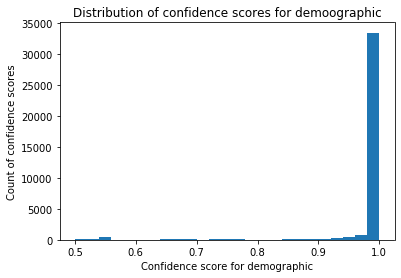

In [14]:
plt.hist(df_demo['confidence_score'], bins = 25)

plt.xlabel("Confidence score for demographic")
plt.ylabel("Count of confidence scores")
plt.title("Distribution of confidence scores for demoographic")
plt.show()

For demographics, there is a very high average for confidence scores, with a heavy left skew distribution as its median is greater than its mean, with its median, and even 25th percentile, at a perfect 1 confidence score. Since our goal is to improve the prediction accuracy for those records with confidence score below 0.5, we are going to focus on the psychographics only for our project. 

In [15]:
df_psych[['confidence_score','minutes_viewed','running_minutes']].describe()

,confidence_score,minutes_viewed,running_minutes
count,303848.000000,303848.000000,303848.000000
mean,0.627092,36.800677,73.081837
std,0.317618,63.448361,34.009141
min,0.000000,0.000000,6.000000
25%,0.330000,2.000000,47.000000
50%,0.690000,19.000000,69.000000
75%,0.930000,62.000000,97.000000
max,1.000000,5482.000000,211.000000


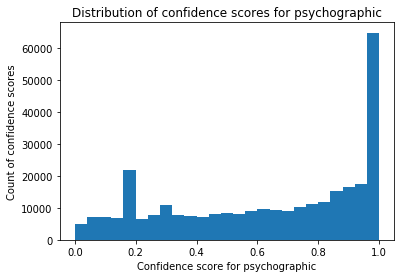

In [16]:
plt.hist(df_psych['confidence_score'], bins = 25)

plt.xlabel("Confidence score for psychographic")
plt.ylabel("Count of confidence scores")
plt.title("Distribution of confidence scores for psychographic")
plt.show()

Text(0, 0.5, 'confidence score')

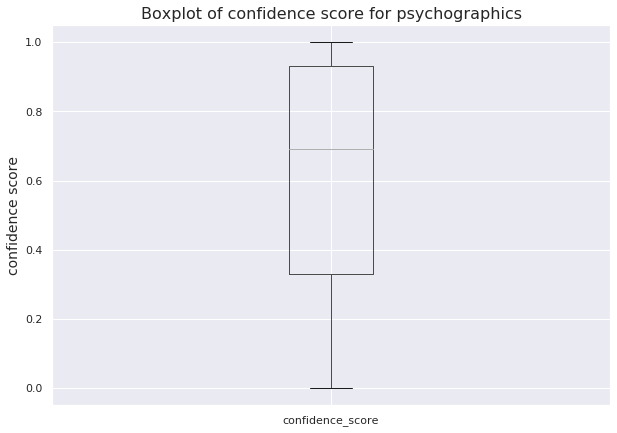

In [38]:
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
boxplot = df_psych.boxplot(column=['confidence_score'])
plt.title("Boxplot of confidence score for psychographics", fontsize = 16)
plt.ylabel("confidence score", fontsize= 14 )

A semi-uniform distribution on the confidence score with a spike of scores around 1. We must exercise caution when working with this data, and we should set some type of cutoff to only retain the best data. Possible data balance is required.

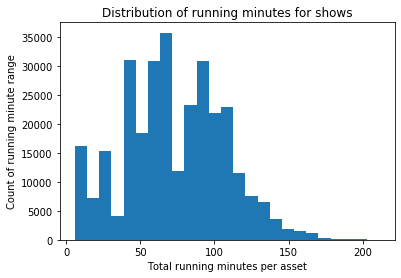

In [17]:
plt.hist(df_psych['running_minutes'], bins = 25)

plt.xlabel("Total running minutes per asset")
plt.ylabel("Count of running minute range")
plt.title("Distribution of running minutes for shows")
plt.show()

Text(0, 0.5, 'running_minutes')

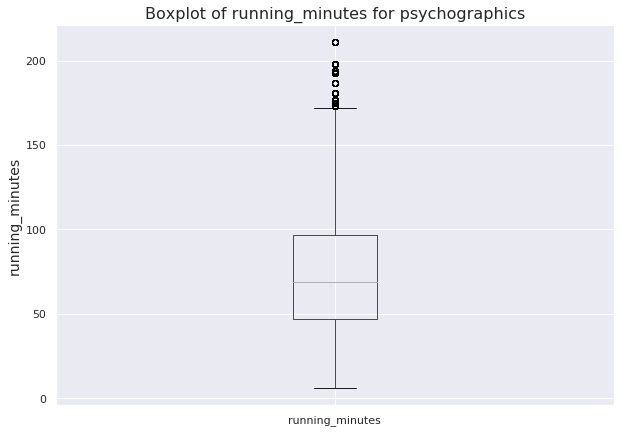

In [39]:
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
boxplot = df_psych.boxplot(column=['running_minutes'])
plt.title("Boxplot of running_minutes for psychographics", fontsize = 16)
plt.ylabel("running_minutes", fontsize= 14 )

We see that most running minutes fall into 5 to 160 minutes.

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


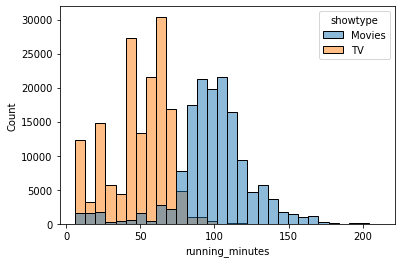

In [18]:
!pip install -U seaborn
import seaborn as sns

sns.histplot(data=df_psych,x='running_minutes', hue = 'showtype', bins = 30)

Predictably, movies tend to be much longer than tv shows. TV shows have two spikes - around 30 and 40 minutes, while movies have a slight right skew with its most around 80 minutes or so.

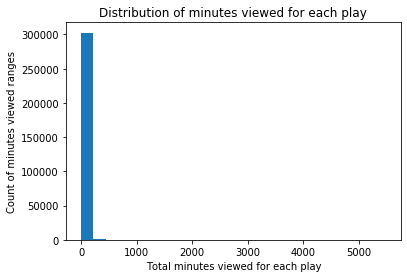

In [19]:
plt.hist(df_psych['minutes_viewed'], bins = 25)

plt.xlabel("Total minutes viewed for each play")
plt.ylabel("Count of minutes viewed ranges")
plt.title("Distribution of minutes viewed for each play")
plt.show()

This distribution has a very large right skew, with its maximum value at 18,078 minutes viewed, per the statistcal summary. Some must be ones people left playing and they weren't watching. These outliers should be eliminated.There are also many minutes viewed near 0, which could be people accidentally hitting play or losing interest after the first few minutes.

Text(0, 0.5, 'minutes_viewed')

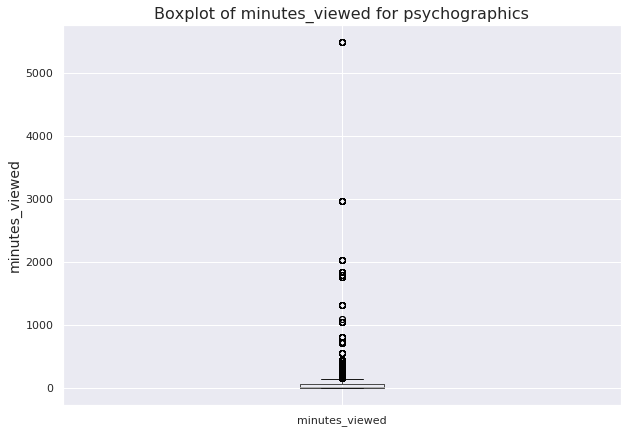

In [41]:
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
boxplot = df_psych.boxplot(column=['minutes_viewed'])
plt.title("Boxplot of minutes_viewed for psychographics", fontsize = 16)
plt.ylabel("minutes_viewed", fontsize= 14 )

From the boxplot we can see that majority of the viewing time stays within a movie length as < 200 min, this can indicate that more people like to watch movies as opposed to TV shows.

In [20]:
# Setting some type of filter, can and will be changed to a better measure for an outlier.

plays_nol = df_psych.loc[(df_psych['minutes_viewed'] < 850) & (df_psych['minutes_viewed'] > 1)]

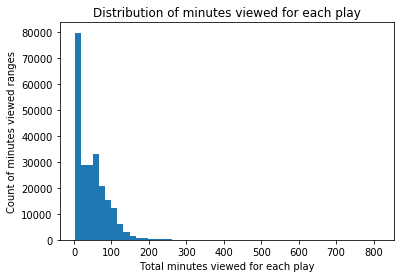

In [21]:
plt.hist(plays_nol['minutes_viewed'], bins = 50)

plt.xlabel("Total minutes viewed for each play")
plt.ylabel("Count of minutes viewed ranges")
plt.title("Distribution of minutes viewed for each play")
plt.show()

This further shows that majority of the viewed times are within a movie length.

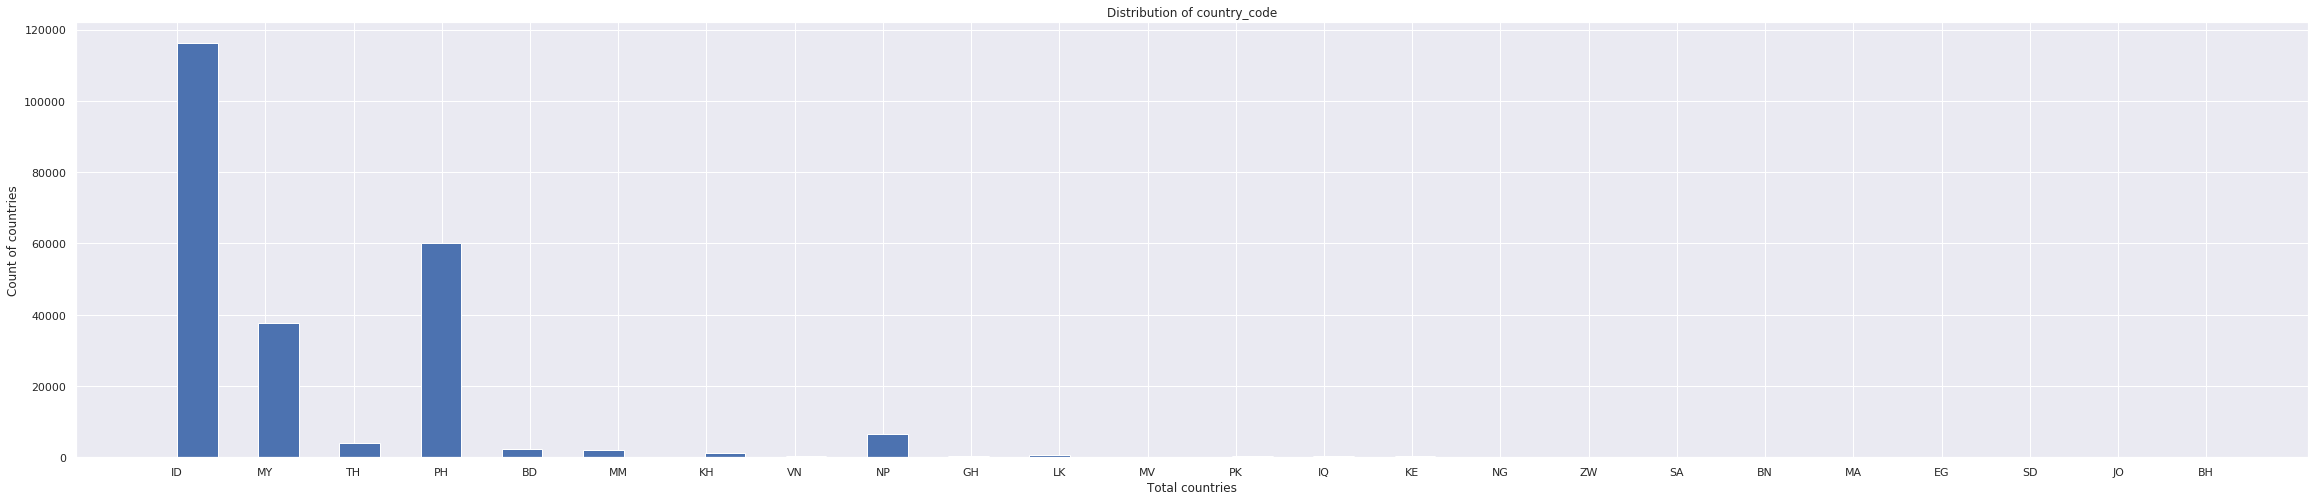

In [50]:
plt.hist(plays_nol['country_code'], bins = 50)

plt.xlabel("Total countries")
plt.ylabel("Count of countries")
plt.title("Distribution of country_code")
plt.show()

The top countries of our customers are from ID, MY, and PH.

In [47]:
# Before continuing, lets add a column for where minutes_viewed < 2


df_psych['minutes_under_2'] = df_psych['minutes_viewed'] < 2



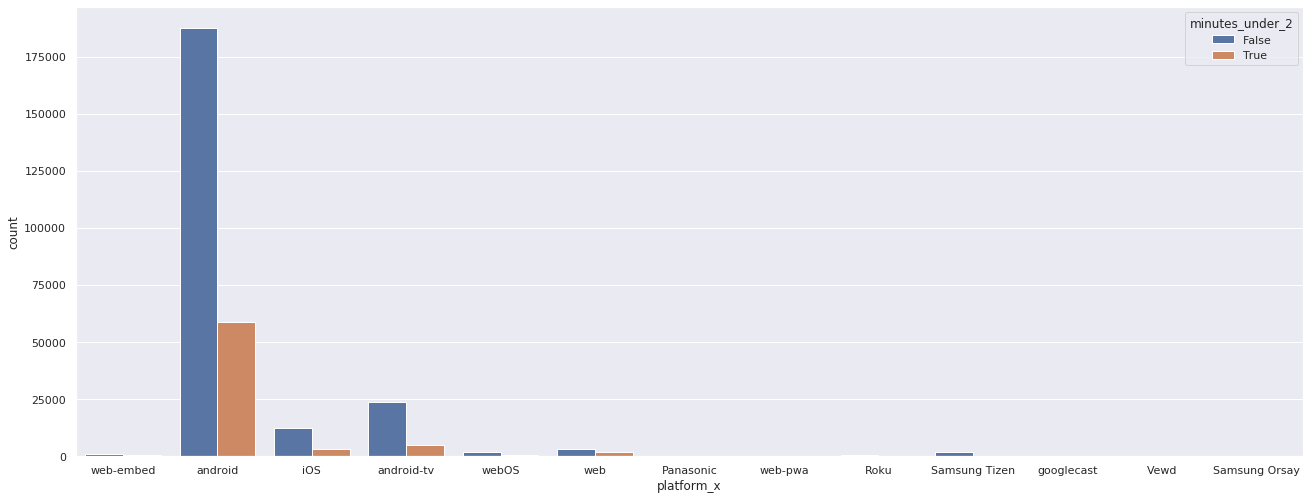

In [23]:
# what types of devices are videos mostly played on?

sns.set(rc={'figure.figsize':(22,8.27)})

sns.countplot(x='platform_x',hue='minutes_under_2',data = df_psych)

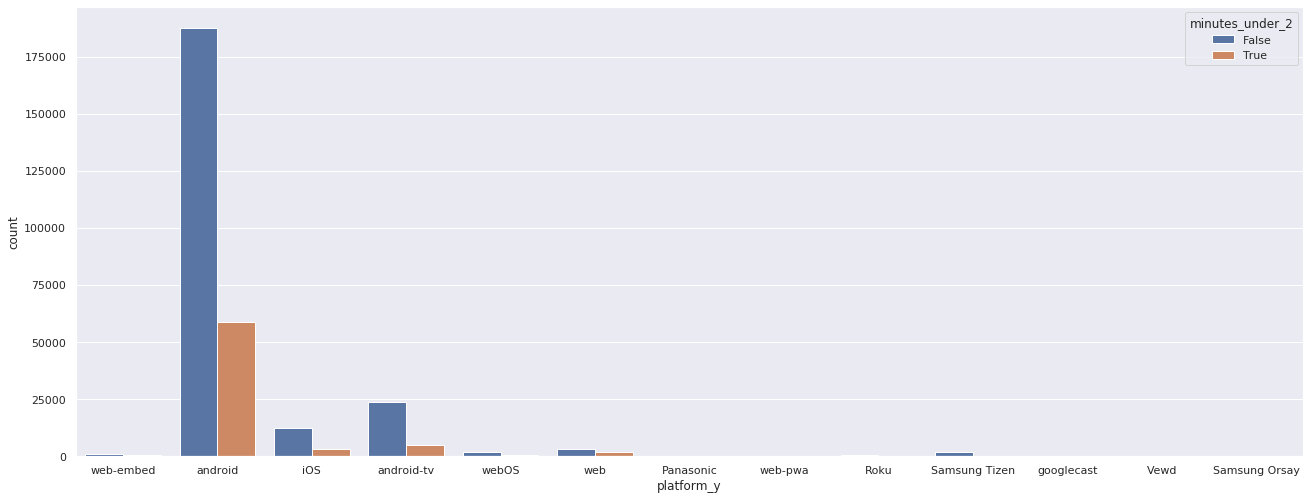

In [24]:
# what types of devices are videos mostly played on?

sns.set(rc={'figure.figsize':(22,8.27)})

sns.countplot(x='platform_y',hue='minutes_under_2',data = df_psych)

For one, it appears that platform_x and platform_y are duplicates, thus, we will remove platform y from our dataframe. Secondly, the majority of views are on an android.

In [42]:
df_psych = df_psych.drop(['platform_y'],axis = 1)
df_psych.head()

,user_id,platform_x,level_1,level_2,level_3,confidence_score,country_code,asset_id,minutes_viewed,showtype,genre,running_minutes,source_language,season_id,series_id,studio_id,minutes_under_2
0,8.589935e+10,web-embed,Psychographics,Movies Lovers,Horror Movies Fans,0.07,ID,10377,1,Movies,Horror,87,Indonesian,NaN,NaN,350.0,True
1,8.589935e+10,web-embed,Psychographics,Movies Lovers,Indonesian Movies Fans,0.03,ID,10377,1,Movies,Horror,87,Indonesian,NaN,NaN,350.0,True
2,2.576980e+10,android,Psychographics,Movies Lovers,Romance Movies Fans,0.52,ID,10377,3,Movies,Horror,87,Indonesian,NaN,NaN,350.0,False
3,2.576980e+10,android,Psychographics,TV Lovers,Kids TV Fans,0.61,ID,10377,3,Movies,Horror,87,Indonesian,NaN,NaN,350.0,False
4,2.576980e+10,android,Psychographics,TV Lovers,Drama TV Fans,0.60,ID,10377,3,Movies,Horror,87,Indonesian,NaN,NaN,350.0,False


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


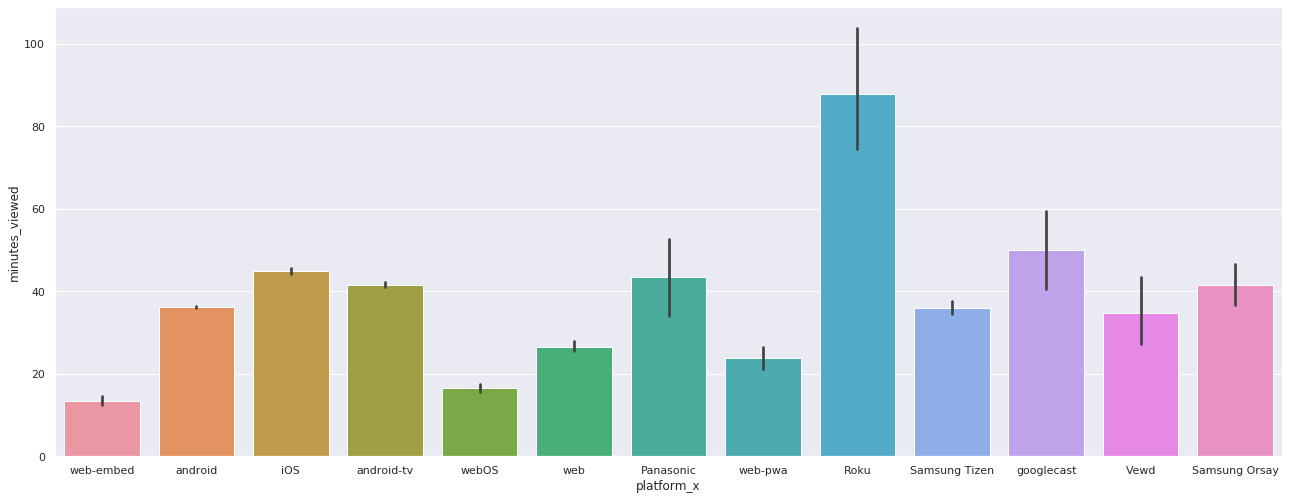

In [43]:
# Seeing how long users watched on certain platforms

sns.set(rc={'figure.figsize':(22,8.27)})

sns.barplot(df_psych['platform_x'],df_psych['minutes_viewed'])

It appears videos on Roku would be viewed much longer than on other platforms even though the user base is in minority. The web-based streaming platforms are generally lower with minutes viewed while mobile devices like android and iOS are in the middle.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


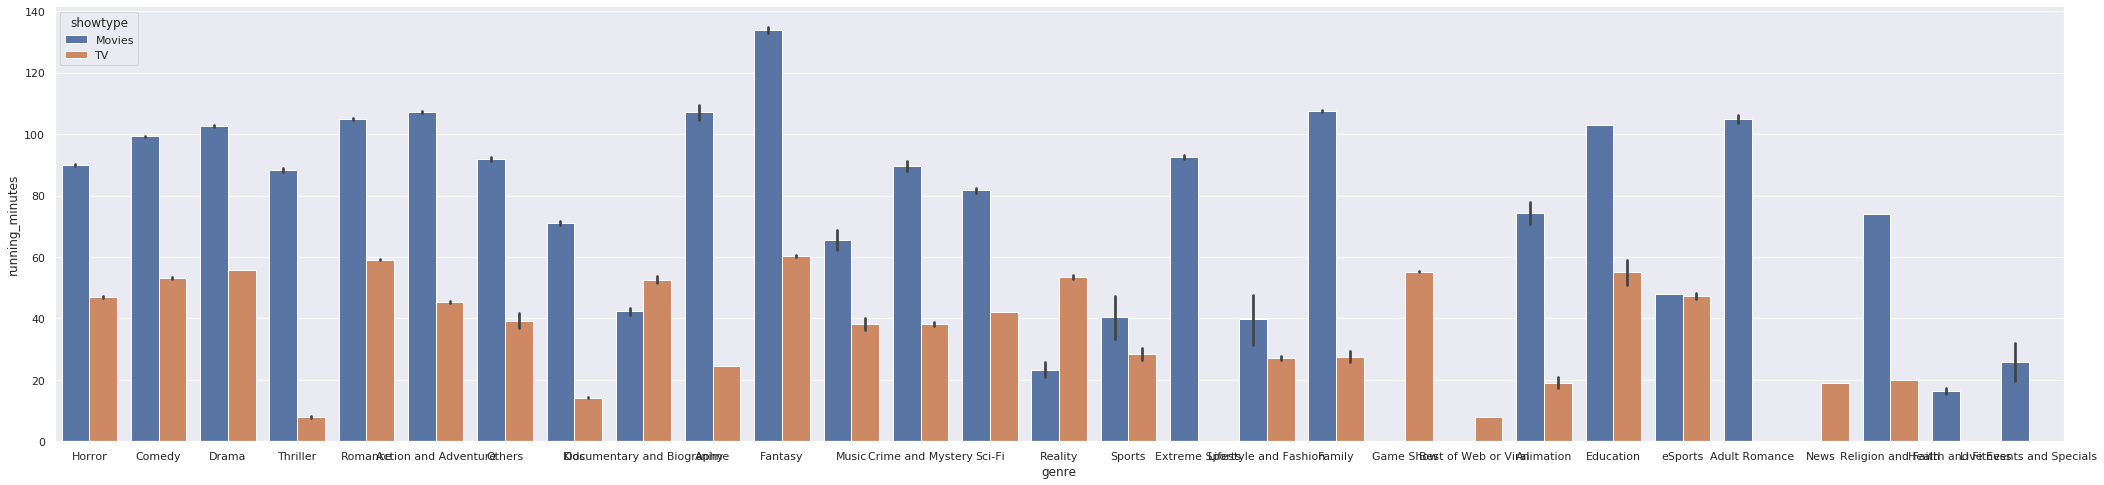

In [44]:
# How long are show/movies? how do they differ? do genres play a role?

sns.set(rc={'figure.figsize':(36,8)})


sns.barplot(df_psych['genre'],df_psych['running_minutes'], hue = df_psych['showtype'])

Again, movies are definitely longer than tv shows except in a select few genres. genres that tend to have short movies than the rest are music, kids, animation and biographical. Kids and web shows are among the shortest shows. Longest movies are fantasy movies. 

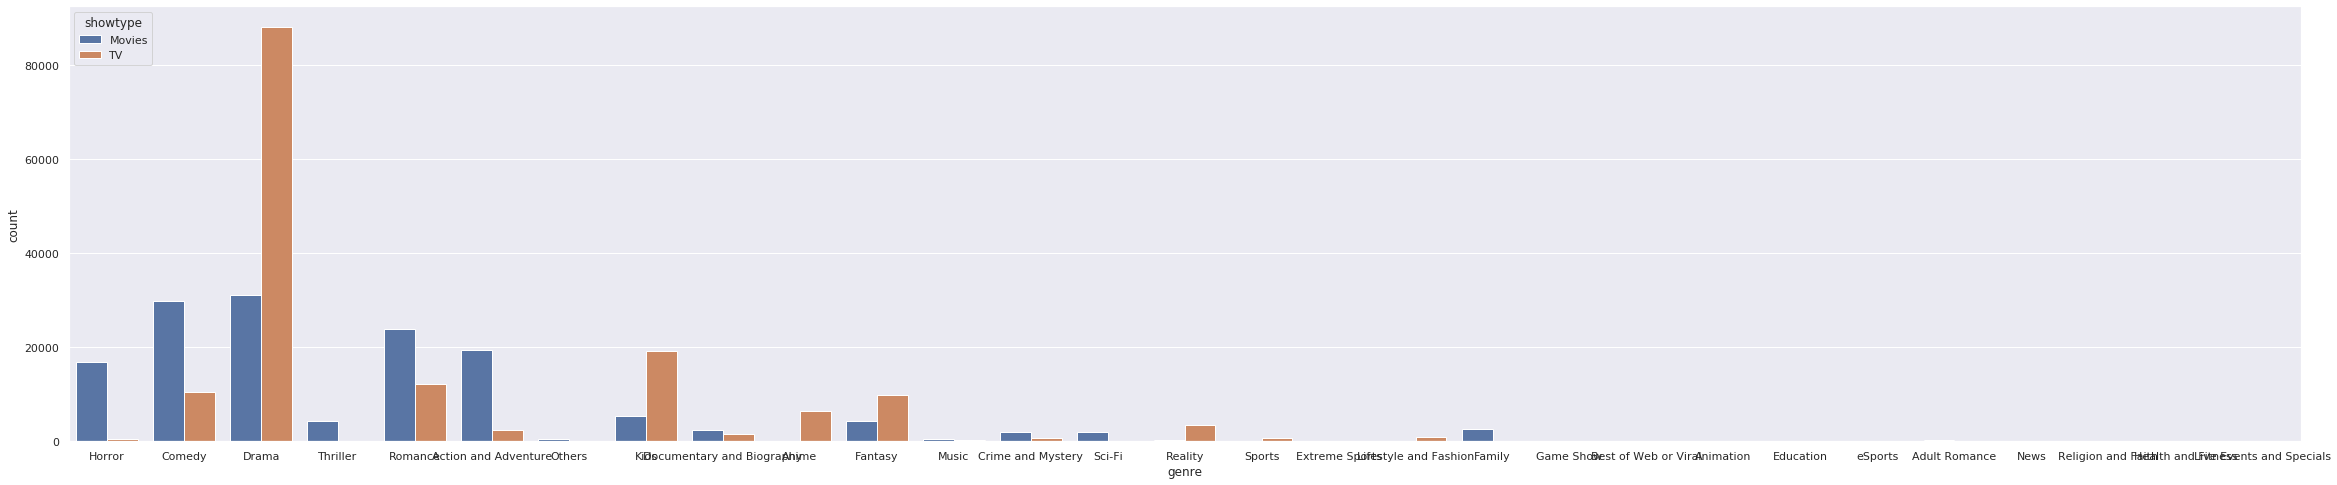

In [45]:
# What genres are represented and how often are each in the dataset? do they differ depending on show type?

sns.set(rc={'figure.figsize':(40,8)})

sns.countplot(x='genre',hue='showtype',data=df_psych)

There are many more tv shows in this data set than movies. The most popular genre for both shows and movies are Dramas. 2nd most popular for shows are kids shows and 2nd most for movies are comedies. 

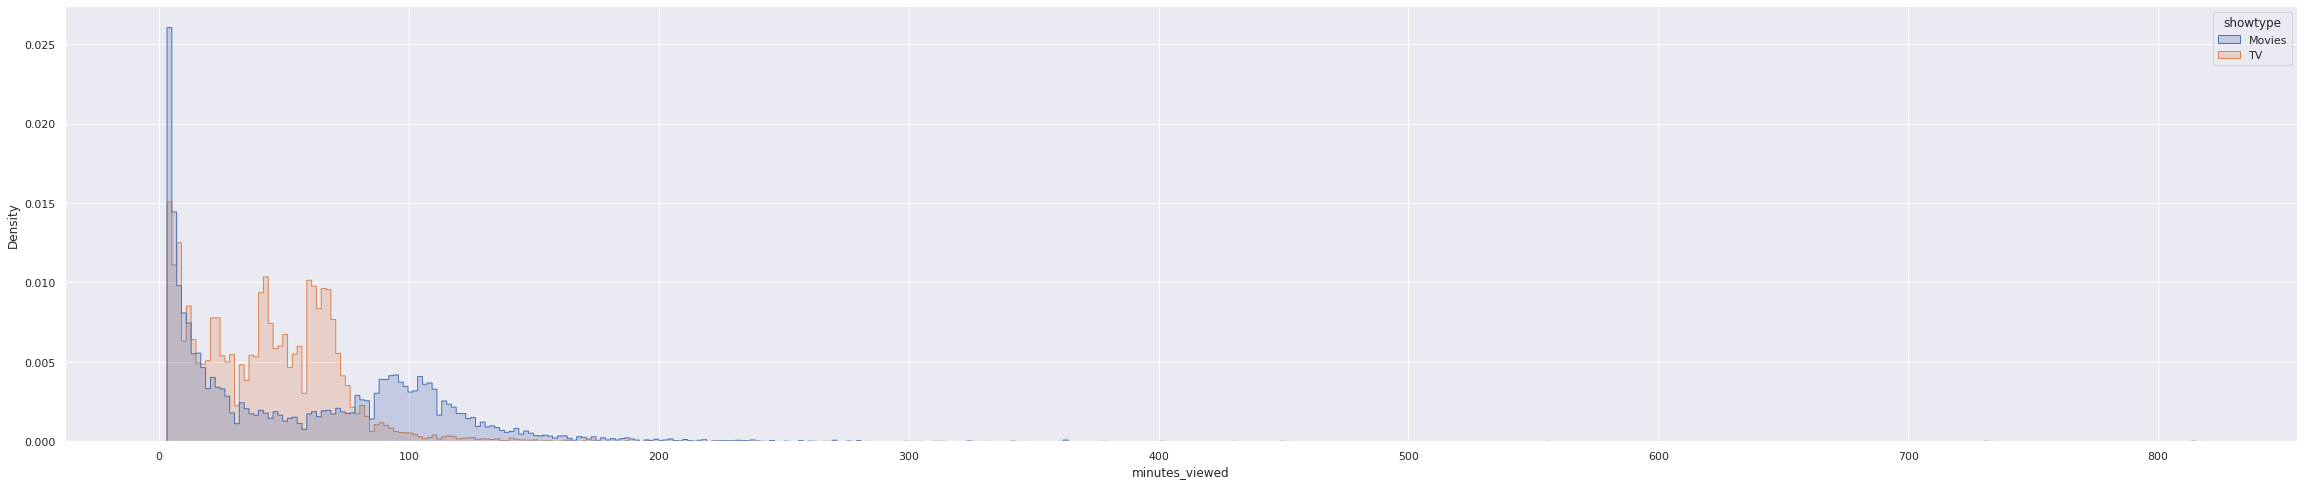

In [28]:
df_psych_NOL = df_psych.loc[(df_psych['minutes_viewed'] < 850) & (df_psych['minutes_viewed'] > 2)]

sns.histplot(df_psych_NOL,x='minutes_viewed',hue='showtype',element='step',stat='density')

Seems like when people watch something between 20 to 80 minutes, it's generally a tv show. If the view time is over 80 minutes, it is more likely a movie.

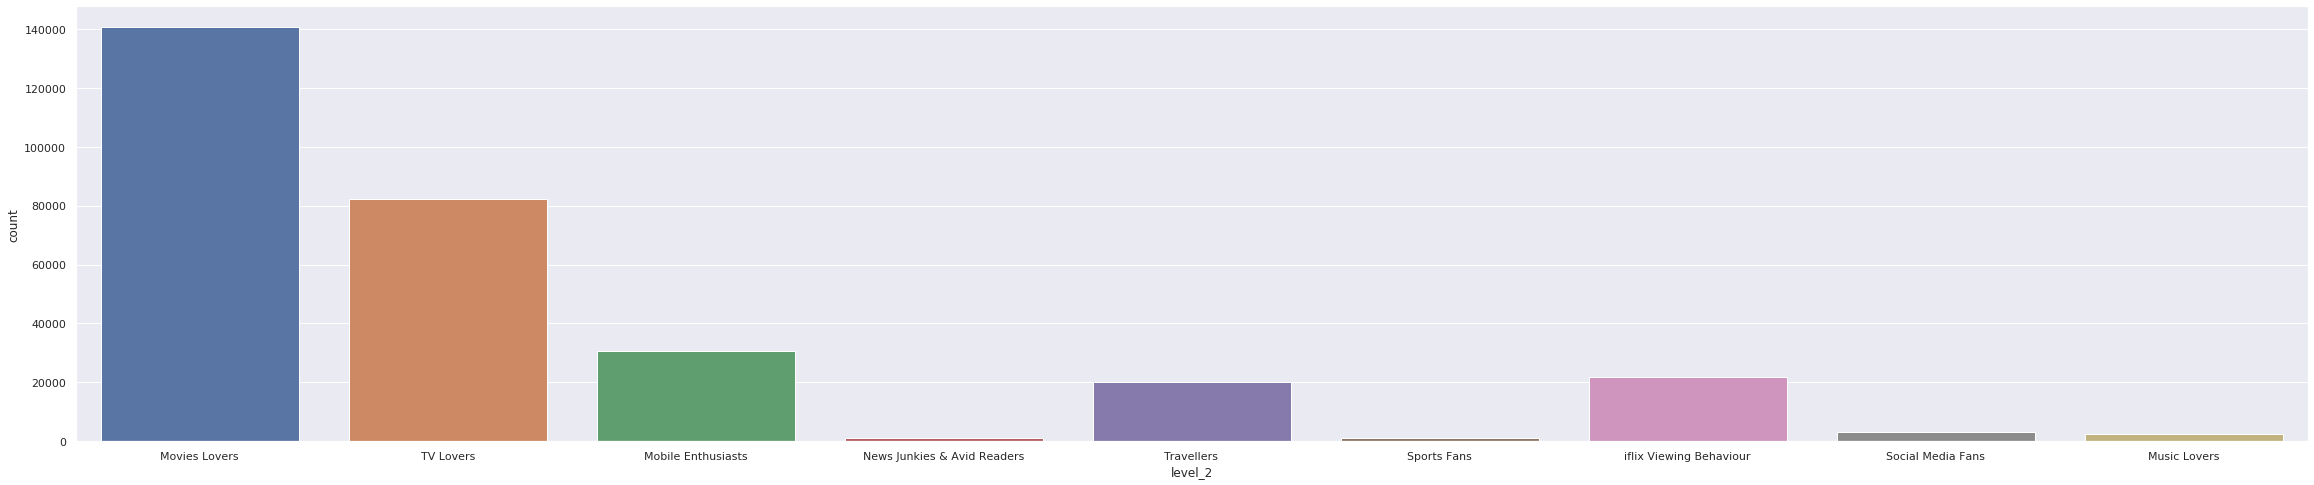

In [46]:
# What types of psychographic traits are there?

sns.countplot(x='level_2',data= df_psych)

From the barchart above we see that there are more Movie Lovers than other type of audience which matches our inital guess.

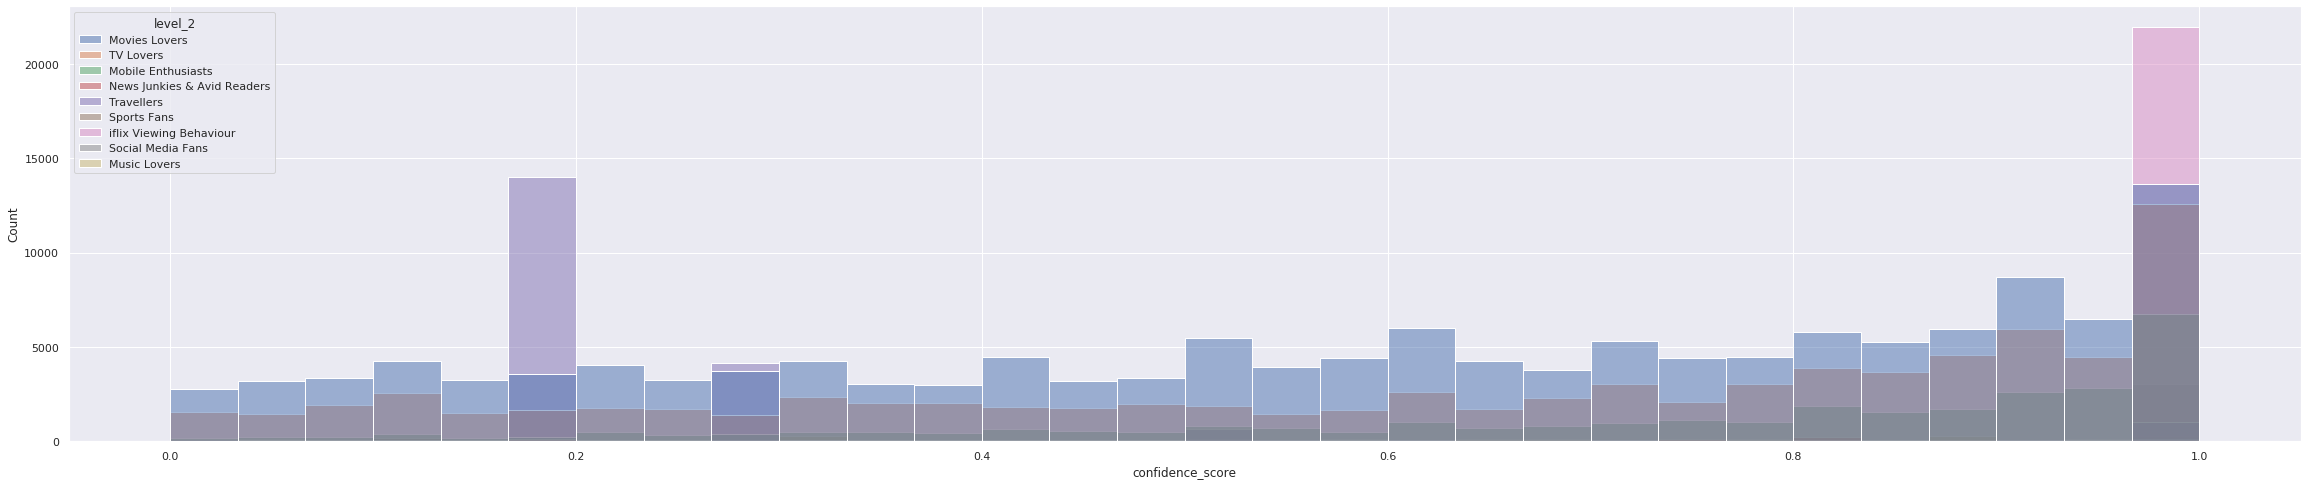

In [30]:
sns.histplot(data=df_psych,x='confidence_score', hue='level_2', bins = 30)

It looks like there is a roughly uniform distribution of confidence scores for level_2 traits for Movie Lovers, TV Lovers, and Music Lovers. There are roughly 15 thousand records with a potentially perfect confidence score, with a majority of them being due to iflix viewing behavior - a created feature iflix created already. This can induce bias in the data

In [31]:
# what types of level 3 traits are there for psychographics?

In [32]:
df_psych['level_3'].unique()

array(['Horror Movies Fans', 'Indonesian Movies Fans',
       'Romance Movies Fans', 'Kids TV Fans', 'Drama TV Fans',
       'English TV Fans', 'Sports TV Fans', 'Malay TV Fans',
       'English Movies Fans', 'High Data Users',
       'Extreme Sports Movies Fans', 'Reality TV Fans', 'Comedy TV Fans',
       'Action and Adventure TV Fans', 'Comedy Movies Fans', nan,
       'Action and Adventure Movies Fans', 'Kids Movies Fans',
       'Local Commuters', 'Indonesian TV Fans', 'Thriller Movies Fans',
       'Korean TV Fans', 'Korean Movies Fans', 'Sci-Fi Movies Fans',
       'Drama Movies Fans', 'player', 'Malay Movies Fans',
       'Anime TV Fans', 'Fantasy Movies Fans', 'Family Movies Fans',
       '"""\\""""\\"""""""', 'Japanese TV Fans', 'casual',
       'Romance TV Fans', 'Japanese Movies Fans', 'Anime Movies Fans',
       'Chinese Movies Fans', 'Thai Movies Fans', 'Horror TV Fans',
       'Crime and Mystery Movies Fans', 'Hindi Movies Fans',
       'Turkish Movies Fans', 'Tagalog Mo

There are many different types of level 3 traits that all spawn off of whatever the level 2 category is. It may prove difficult to predict for all of these traits. 

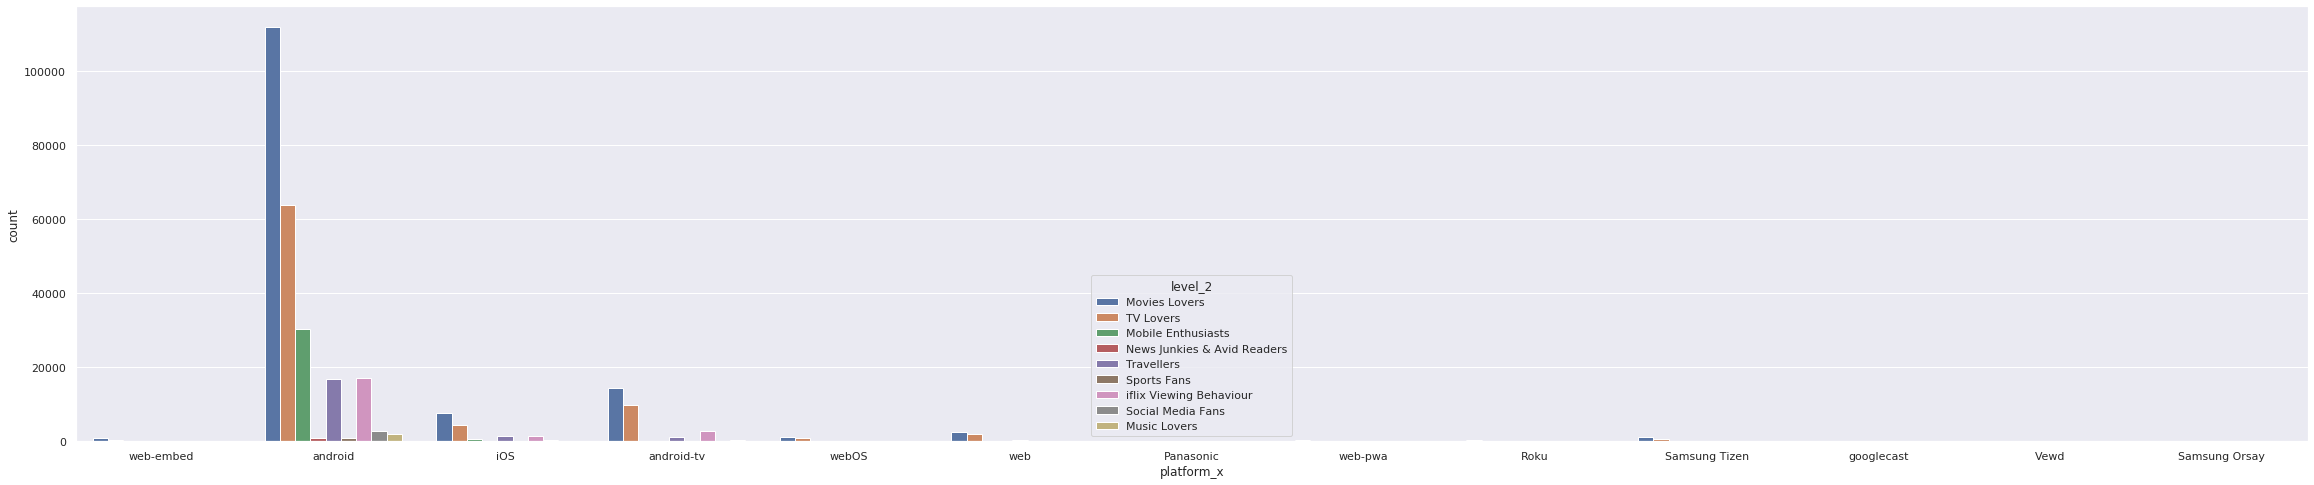

In [33]:
sns.countplot(data=df_psych,x='platform_x',hue = 'level_2')

Most of the mobile enthusiasts are android users. The other level 2 traits are roughly similar for all platforms. A bit more travellers with mobile devices.

# Conclusion

From the data exploration we can conclude that most of our user base enjoys drama movies more and uses android as their main platform; the top 3 countries of our user base is ID, PH, and MY. Other features inclduing level_3 traits, source_language, season_id, series_id and studio_id contain missing values and will be cleaned in the next stage along with balancing the data.